# Bike Sharing Assignment #

## 1. Problem Statement ##

Background: A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

BoomBikes want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# 2. Data Provided ##

The data shared is from a Consumer Finance company specializing in lending various types of loans. The data consist of 730 rows spread across 16 columns. One of the columns indicates whether the loan is currently 

1. Ongoing
2. Fully Paid - Loan Fully paid by the Consumer
3. Charged Off - Consumer who has defaulted the loans and are marked for Collections by the Company.

In [2]:
# import data file

bike_sharing_data  = pd.read_csv("./day.csv")

print(bike_sharing_data.shape)
bike_sharing_data.head(5)

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 1. Data Cleanup using EDA ##

The first step to cleanup data using EDA Techniques.

1.1 Cleanup of all Null Columns

In [3]:
bike_sharing_data_backup = bike_sharing_data

type(bike_sharing_data.isnull().sum())

filtered_series = bike_sharing_data.isnull().sum()[bike_sharing_data.isnull().sum()==730]

print(filtered_series)

filtered_series.to_csv('cols_having_empty_header.csv',header=['Count of Row Values'],index=True)


Series([], dtype: int64)


There are no null valued cells. So, let us proceed with finding unique value of columns

In [4]:
unique_count_of_values = bike_sharing_data.nunique()

print(unique_count_of_values[unique_count_of_values==1].index.tolist())


[]


Upon analysis, there are no unique count of values. 

In [5]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
print(bike_sharing_data.info())
print(bike_sharing_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workin

In [7]:
# Droping instant column as it is index column which has nothing to do with target
bike_sharing_data.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike_sharing_data.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

#bike_sharing_data.drop(['casual'], axis = 1, inplace = True)
#bike_sharing_data.drop(['registered'], axis = 1, inplace = True)

In [8]:
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:


bike_sharing_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543


<Figure size 1500x3000 with 0 Axes>

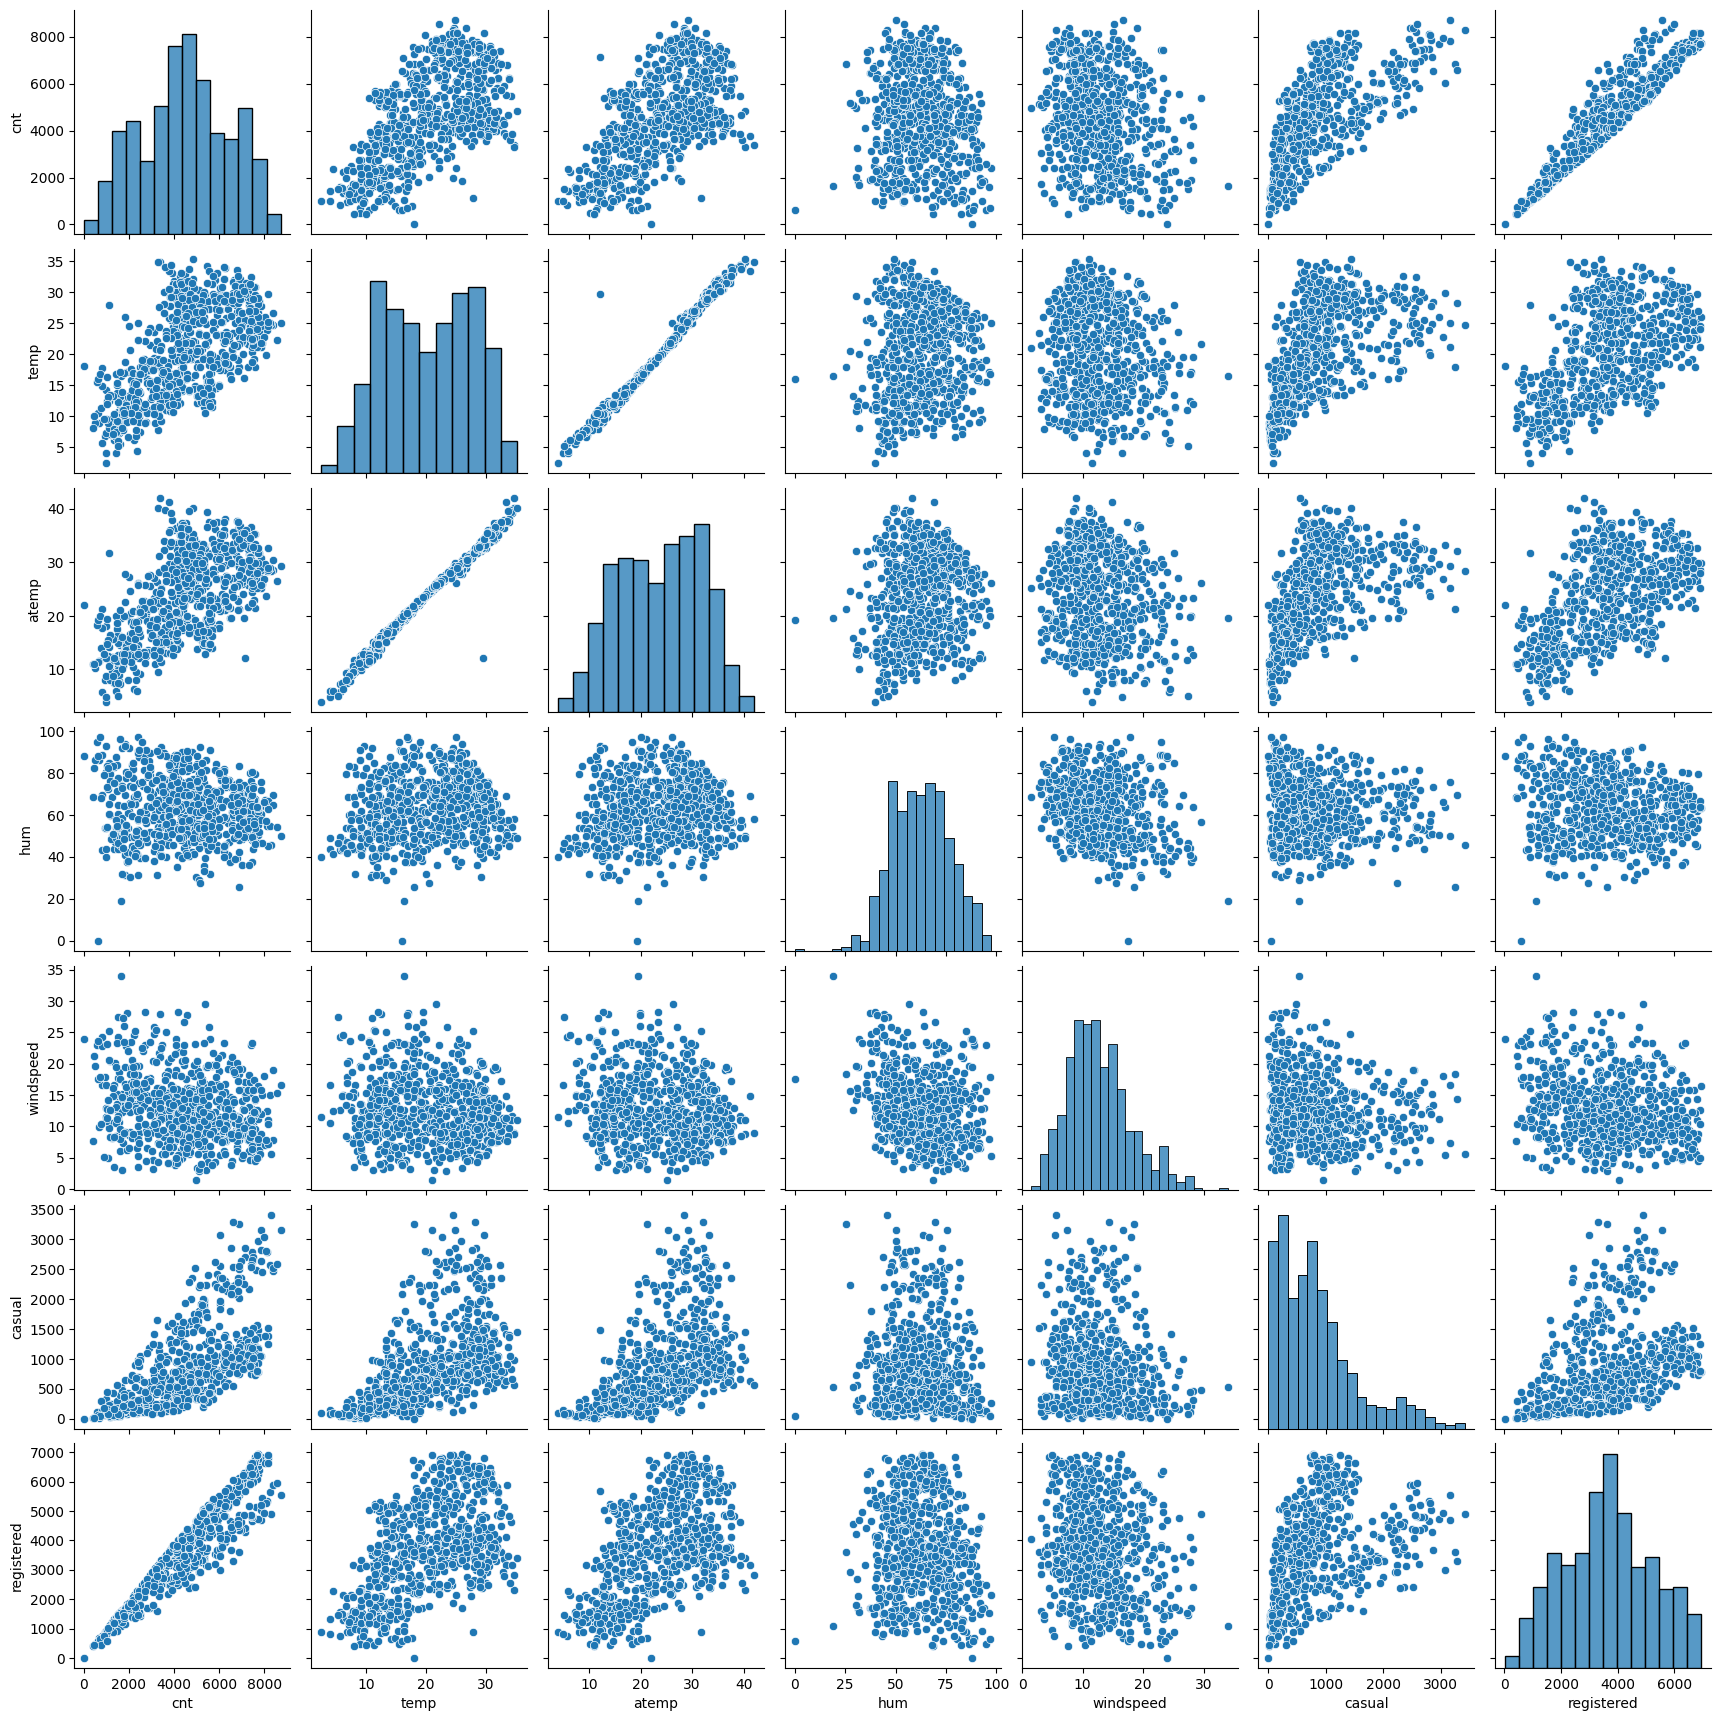

In [10]:
#Draw pairplots for continuous numeric variables using seaborn
pt.figure(figsize = (15,30))
sns.pairplot(data=bike_sharing_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed','casual','registered'])
pt.show()

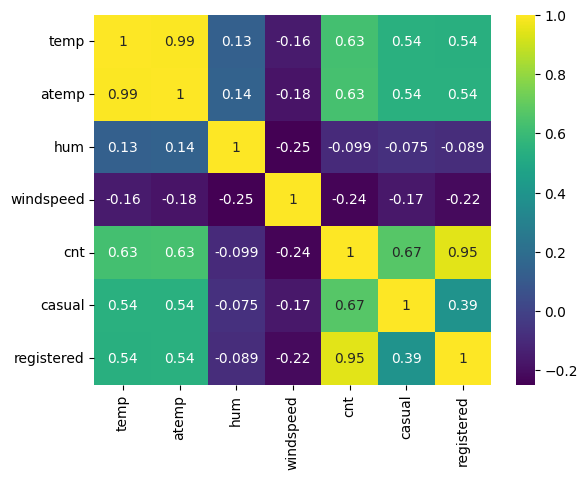

In [11]:
sns.heatmap(bike_sharing_data[['temp','atemp','hum','windspeed','cnt','casual','registered']].corr(), cmap='viridis', annot = True)
pt.show()

In [12]:
bike_sharing_data.drop(['temp'], axis = 1, inplace = True)


In [13]:
bike_sharing_data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,82,1518,1600


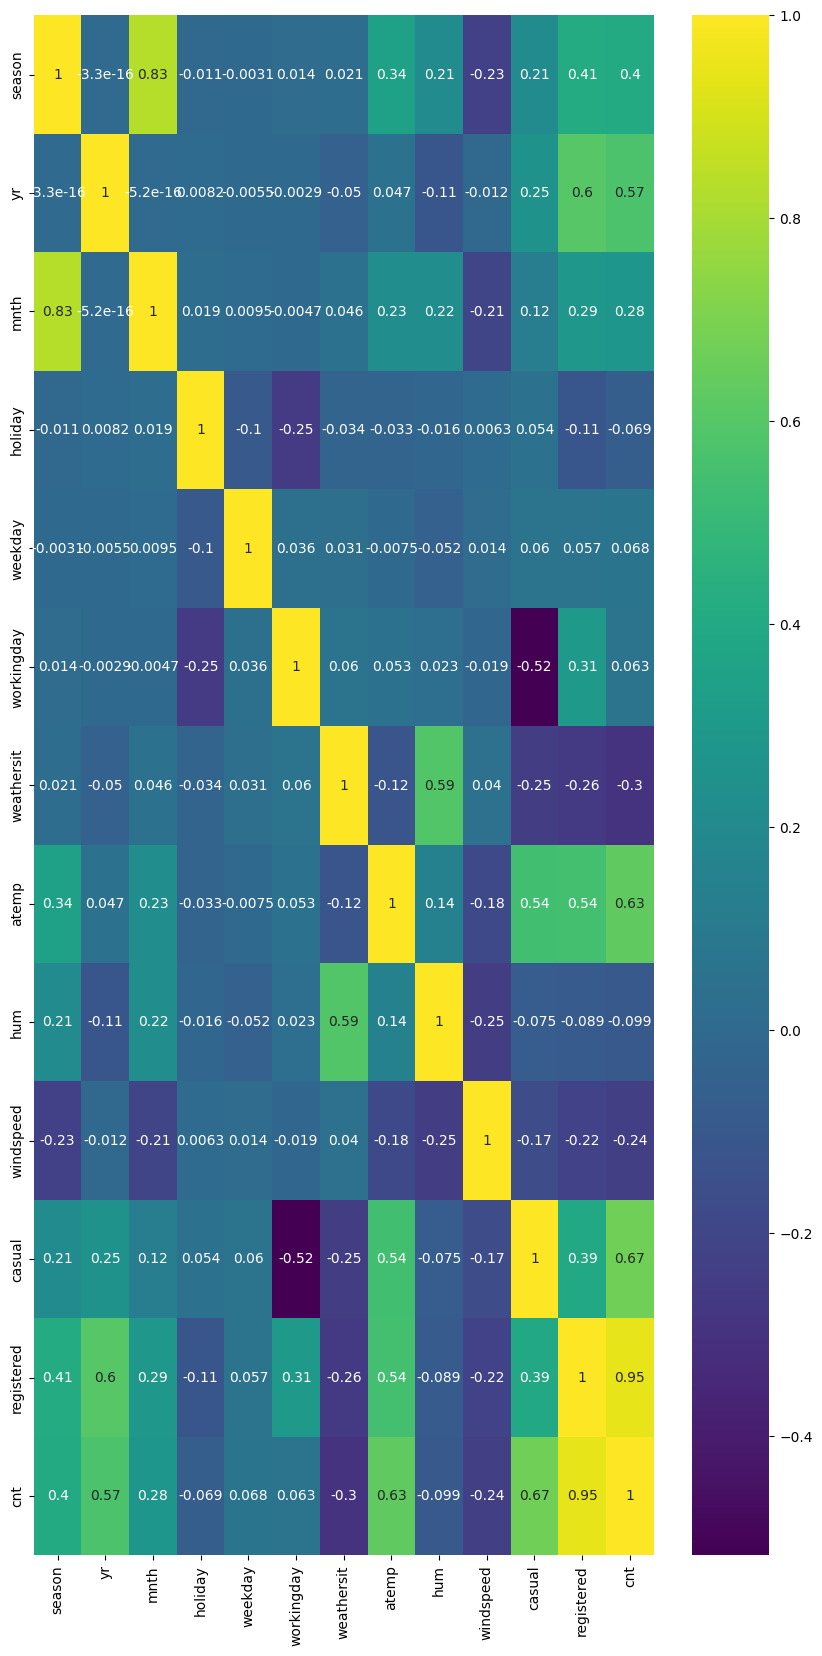

In [14]:
pt.figure(figsize = (10,20))
sns.heatmap(bike_sharing_data.corr(), cmap='viridis', annot = True)
pt.show()

In [15]:
bike_sharing_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_sharing_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
# bike_sharing_data.holiday.replace({0:'not_holiday',1:'holiday'},inplace = True)

bike_sharing_data.yr.replace({0:2018,1:2019},inplace = True)

bike_sharing_data.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'},inplace = True)

bike_sharing_data.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'},inplace = True)
# bike_sharing_data.workingday = bike_sharing_data.workingday.replace({0:'not_working_day',1:'working_day'})
bike_sharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,jan,0,sat,0,moderate,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,jan,0,sun,0,moderate,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,jan,0,mon,1,good,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,jan,0,tue,1,good,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,jan,0,wed,1,good,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
bike_sharing_data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,jan,0,sat,0,moderate,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,jan,0,sun,0,moderate,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,jan,0,mon,1,good,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,jan,0,tue,1,good,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,jan,0,wed,1,good,11.46350,43.6957,12.522300,82,1518,1600


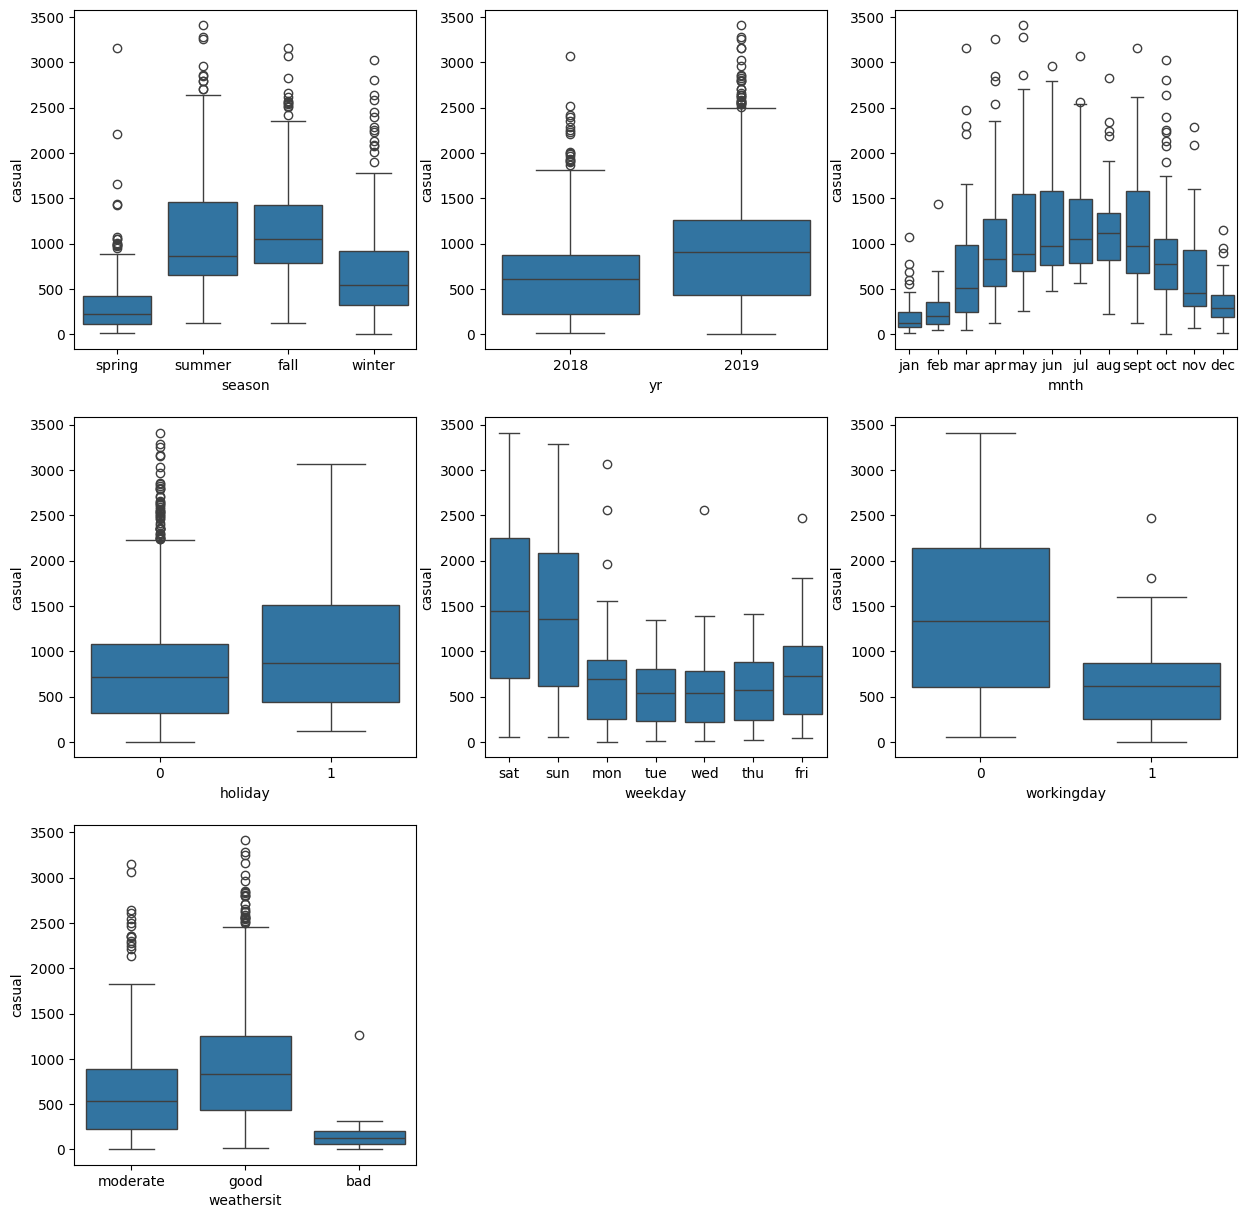

In [17]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
pt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    pt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_sharing_data, x=i[1], y='casual')
pt.show()



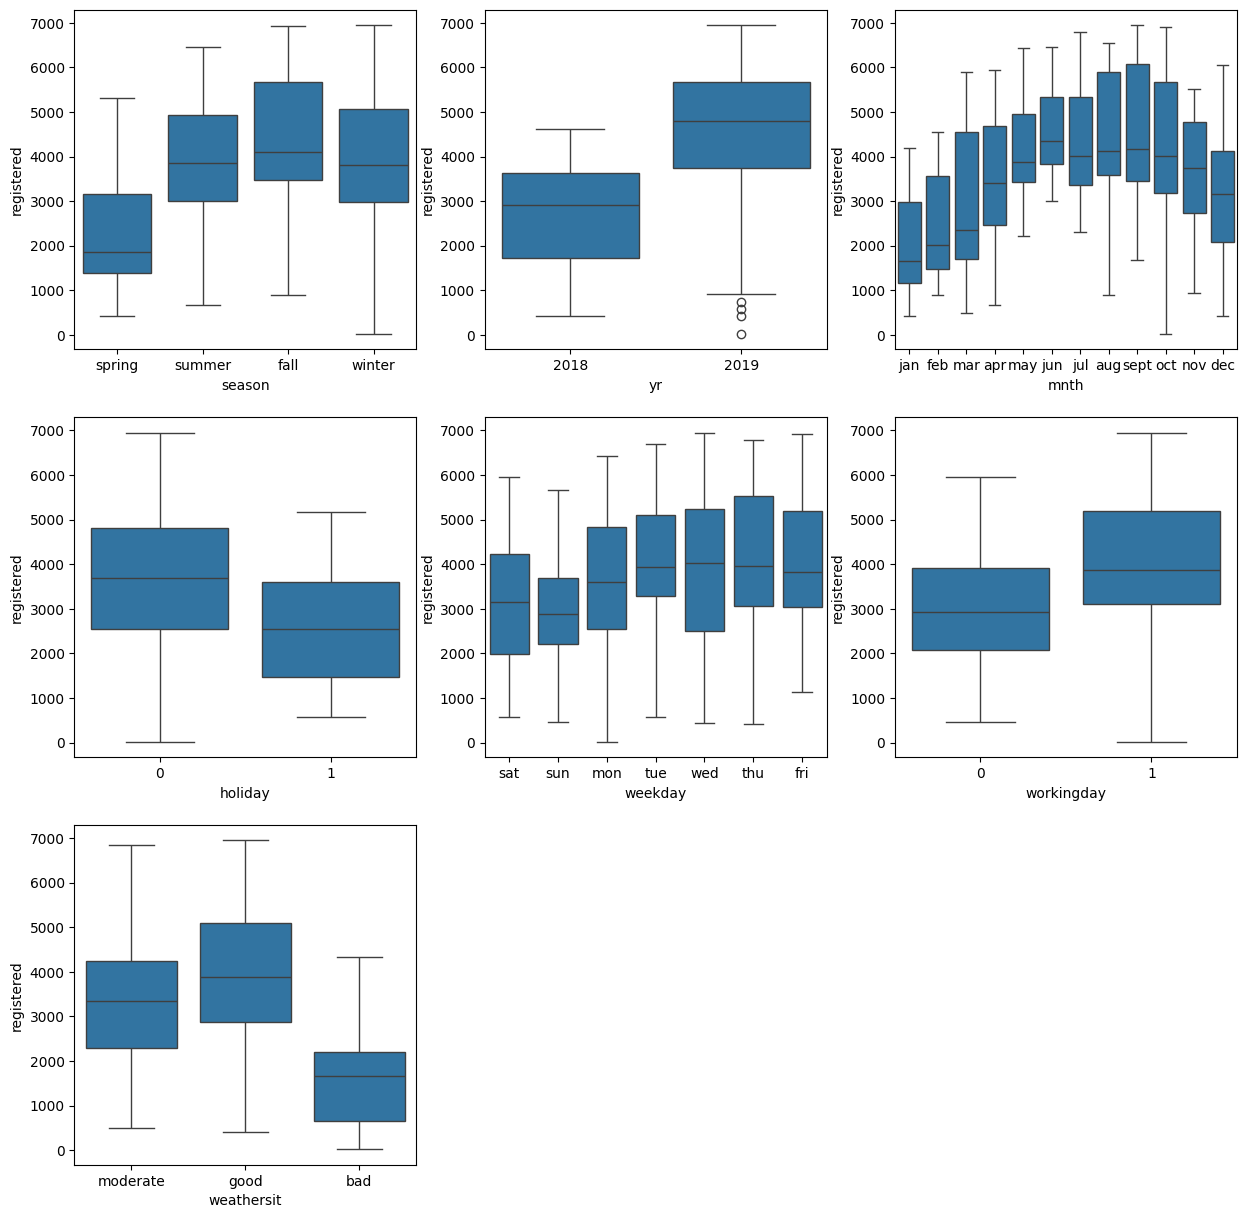

In [18]:
pt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    pt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_sharing_data, x=i[1], y='registered')
pt.show()

Preparation of Data for Linear Regression

In [19]:
bike_sharing_data = pd.get_dummies(data=bike_sharing_data,columns=["season","mnth","weekday"],drop_first=True)
bike_sharing_data = pd.get_dummies(data=bike_sharing_data,columns=["weathersit"])

In [20]:
bike_sharing_data.head()


,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,2018,0,0,18.18125,80.5833,10.749882,331,654,985,True,...,False,False,True,False,False,False,False,False,False,True
1,2018,0,0,17.68695,69.6087,16.652113,131,670,801,True,...,False,False,False,True,False,False,False,False,False,True
2,2018,0,1,9.47025,43.7273,16.636703,120,1229,1349,True,...,False,True,False,False,False,False,False,False,True,False
3,2018,0,1,10.60610,59.0435,10.739832,108,1454,1562,True,...,False,False,False,False,False,True,False,False,True,False
4,2018,0,1,11.46350,43.6957,12.522300,82,1518,1600,True,...,False,False,False,False,False,False,True,False,True,False


In [21]:
bike_sharing_data.head()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,2018,0,0,18.18125,80.5833,10.749882,331,654,985,True,...,False,False,True,False,False,False,False,False,False,True
1,2018,0,0,17.68695,69.6087,16.652113,131,670,801,True,...,False,False,False,True,False,False,False,False,False,True
2,2018,0,1,9.47025,43.7273,16.636703,120,1229,1349,True,...,False,True,False,False,False,False,False,False,True,False
3,2018,0,1,10.60610,59.0435,10.739832,108,1454,1562,True,...,False,False,False,False,False,True,False,False,True,False
4,2018,0,1,11.46350,43.6957,12.522300,82,1518,1600,True,...,False,False,False,False,False,False,True,False,True,False


In [22]:
cols_to_be_modified = ['season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']

for column_index in cols_to_be_modified:
       bike_sharing_data[column_index] = bike_sharing_data[column_index].astype(int)

bike_sharing_data.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [23]:
bike_sharing_data.head()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,2018,0,0,18.18125,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,0,1
1,2018,0,0,17.68695,69.6087,16.652113,131,670,801,1,...,0,0,0,1,0,0,0,0,0,1
2,2018,0,1,9.47025,43.7273,16.636703,120,1229,1349,1,...,0,1,0,0,0,0,0,0,1,0
3,2018,0,1,10.60610,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,1,0
4,2018,0,1,11.46350,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,1,0,1,0


Split Data into Test and Training Set

In [24]:
bike_sharing_data_dep =bike_sharing_data.pop('cnt')
bike_sharing_data_indep = bike_sharing_data

bike_sharing_data_dep.head(5)

bs_train_X,bs_test_X,bs_train_y,bs_test_y = train_test_split(bike_sharing_data_indep,bike_sharing_data_dep,test_size=0.3,random_state=56)
bs_train_X.head(5)

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
218,2018,0,0,35.76460,75.2917,13.499629,1298,2487,0,0,...,0,0,0,1,0,0,0,0,1,0
323,2018,0,0,22.85290,68.4583,12.458650,787,2733,0,0,...,0,0,0,1,0,0,0,0,0,1
195,2018,0,1,31.21855,59.1250,12.249811,1318,4220,0,0,...,0,0,0,0,0,0,0,0,1,0
618,2019,0,1,27.71460,52.0000,6.167631,1070,6697,0,0,...,1,0,0,0,0,1,0,0,1,0
486,2019,0,1,26.89480,79.7083,9.249886,667,5502,0,1,...,0,0,0,0,0,0,1,0,1,0


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [26]:

scaler = MinMaxScaler()

bs_train_X['atemp'] = scaler.fit_transform(bs_train_X.atemp.array.reshape(-1,1))

bs_train_X['hum'] = scaler.fit_transform(bs_train_X.hum.array.reshape(-1,1))

bs_train_X['windspeed'] = scaler.fit_transform(bs_train_X.windspeed.array.reshape(-1,1))

bs_train_X['casual'] = scaler.fit_transform(bs_train_X.casual.array.reshape(-1,1))

bs_train_X['registered'] = scaler.fit_transform(bs_train_X.registered.array.reshape(-1,1))

bs_train_X.head(5)
# bs_test_X['atemp','hum','windspeed'] = scaler.fit_transform(bs_test_X['atemp','hum','windspeed'])


bs_test_X['atemp'] = scaler.transform(bs_test_X.atemp.array.reshape(-1,1))

bs_test_X['hum'] = scaler.transform(bs_test_X.hum.array.reshape(-1,1))

bs_test_X['windspeed'] = scaler.transform(bs_test_X.windspeed.array.reshape(-1,1))

bs_test_X['casual'] = scaler.transform(bs_test_X.casual.array.reshape(-1,1))

bs_test_X['registered'] = scaler.transform(bs_test_X.registered.array.reshape(-1,1))


Now Build a Linear Regression

In [27]:
linear_reg = LinearRegression()
linear_reg.fit(bs_train_X,bs_train_y)

LinearRegression()

In [28]:
#Cut down number of features to 25 using automated approach
rfe = RFE(linear_reg,n_features_to_select=25)
rfe.fit(bs_train_X,bs_train_y)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [29]:
#Columns selected by RFE and their weights
list(zip(bs_train_X.columns,rfe.support_,rfe.ranking_))

[('yr', False, 7),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 4),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 3),
 ('weekday_tue', False, 2),
 ('weekday_wed', True, 1),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [30]:
def build_model(cols):
    X_train_sm = sm.add_constant(bs_train_X[cols])
    lm = sm.OLS(bs_train_y, X_train_sm).fit()
    print(lm.summary())
    return lm

In [31]:
# Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = bs_train_X[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [32]:
bs_train_X.columns[rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_wed',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [33]:
bs_train_X.columns[~rfe.support_]

Index(['yr', 'season_summer', 'mnth_aug', 'mnth_jun', 'weekday_thu',
       'weekday_tue'],
      dtype='object')

In [34]:
sel_cols_rfe =['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_wed',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate']
bs_train_X = bs_train_X[sel_cols_rfe]

bs_train_X.shape

(511, 25)

Build Model

In [35]:
build_model(sel_cols_rfe)
get_vif(sel_cols_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.171e+29
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:52:29   Log-Likelihood:                 12157.
No. Observations:                 511   AIC:                        -2.427e+04
Df Residuals:                     487   BIC:                        -2.417e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 313.8947   3

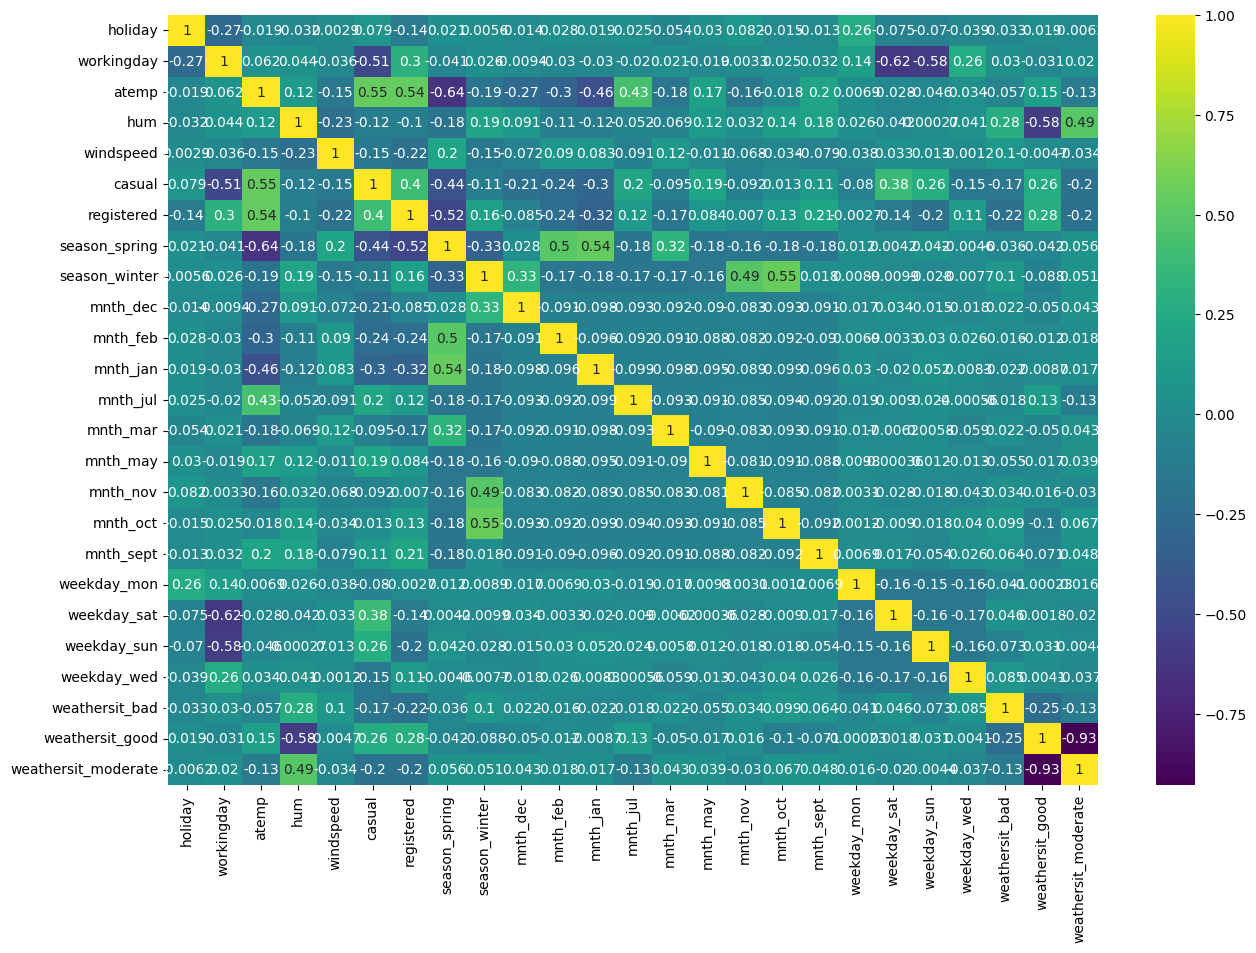

In [36]:
pt.figure(figsize = (15,10))
sns.heatmap(bs_train_X[sel_cols_rfe].corr(), cmap='viridis', annot=True)
pt.show()

In [37]:
# dropping working day,weathersit_moderate as they are highly correlated

sel_cols_rfe =['holiday','atemp', 'hum', 'windspeed', 'casual',
       'registered','season_winter', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_wed',
       'weathersit_bad', 'weathersit_good','season_spring']
bs_train_X = bs_train_X[sel_cols_rfe]

build_model(sel_cols_rfe)
get_vif(sel_cols_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.211e+29
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:52:30   Log-Likelihood:                 11741.
No. Observations:                 511   AIC:                        -2.343e+04
Df Residuals:                     487   BIC:                        -2.333e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             497.0000   1.14e-11   4.

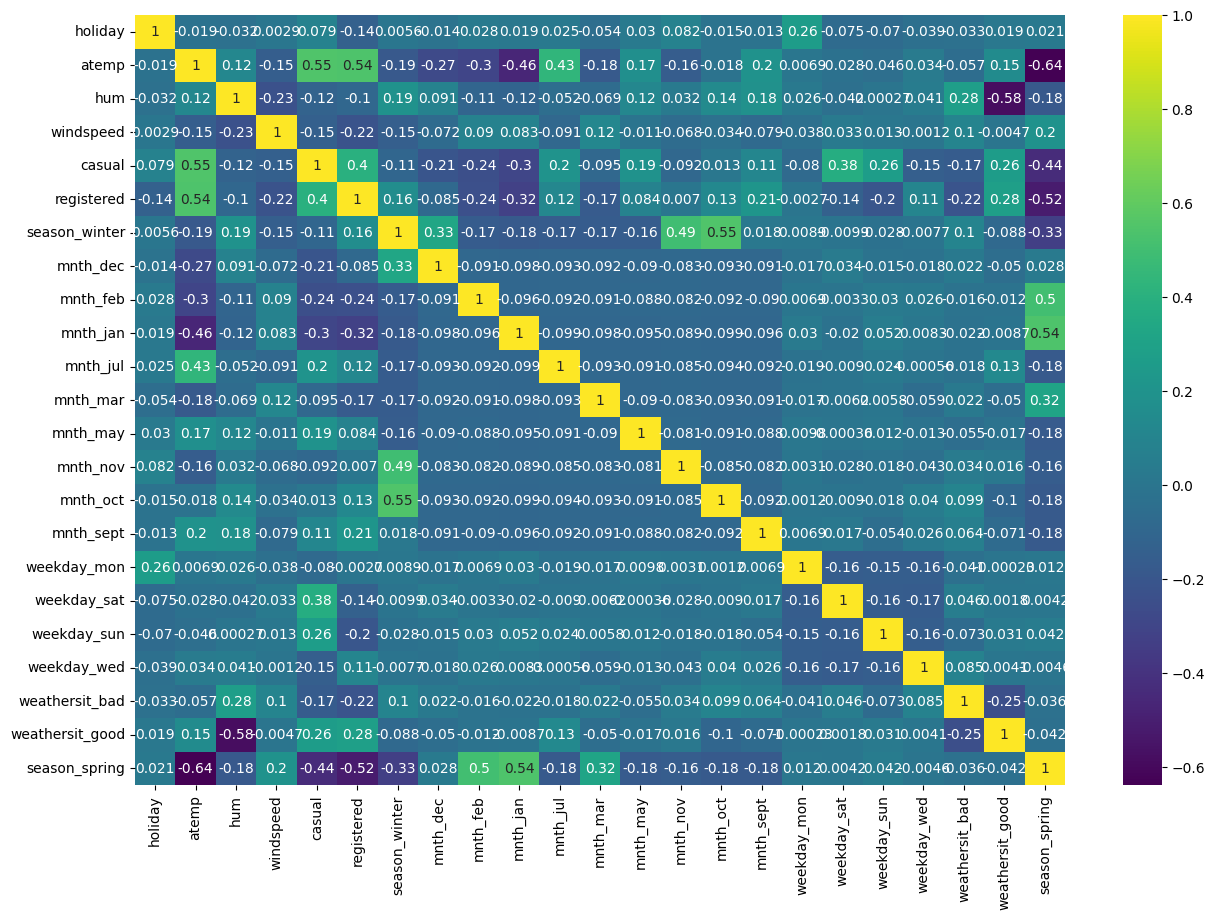

In [38]:
pt.figure(figsize = (15,10))
sns.heatmap(bs_train_X[sel_cols_rfe].corr(), cmap='viridis', annot=True)
pt.show()

In [39]:
# Dropping hum,,'season_spring'
sel_cols_rfe =['holiday','atemp', 'windspeed', 'casual','registered',
       'season_winter', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_wed',
       'weathersit_bad', 'weathersit_good']
bs_train_X = bs_train_X[sel_cols_rfe]
       
build_model(sel_cols_rfe)
get_vif(sel_cols_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.698e+30
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:52:31   Log-Likelihood:                 12510.
No. Observations:                 511   AIC:                        -2.498e+04
Df Residuals:                     489   BIC:                        -2.488e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             497.0000   1.91e-12    2

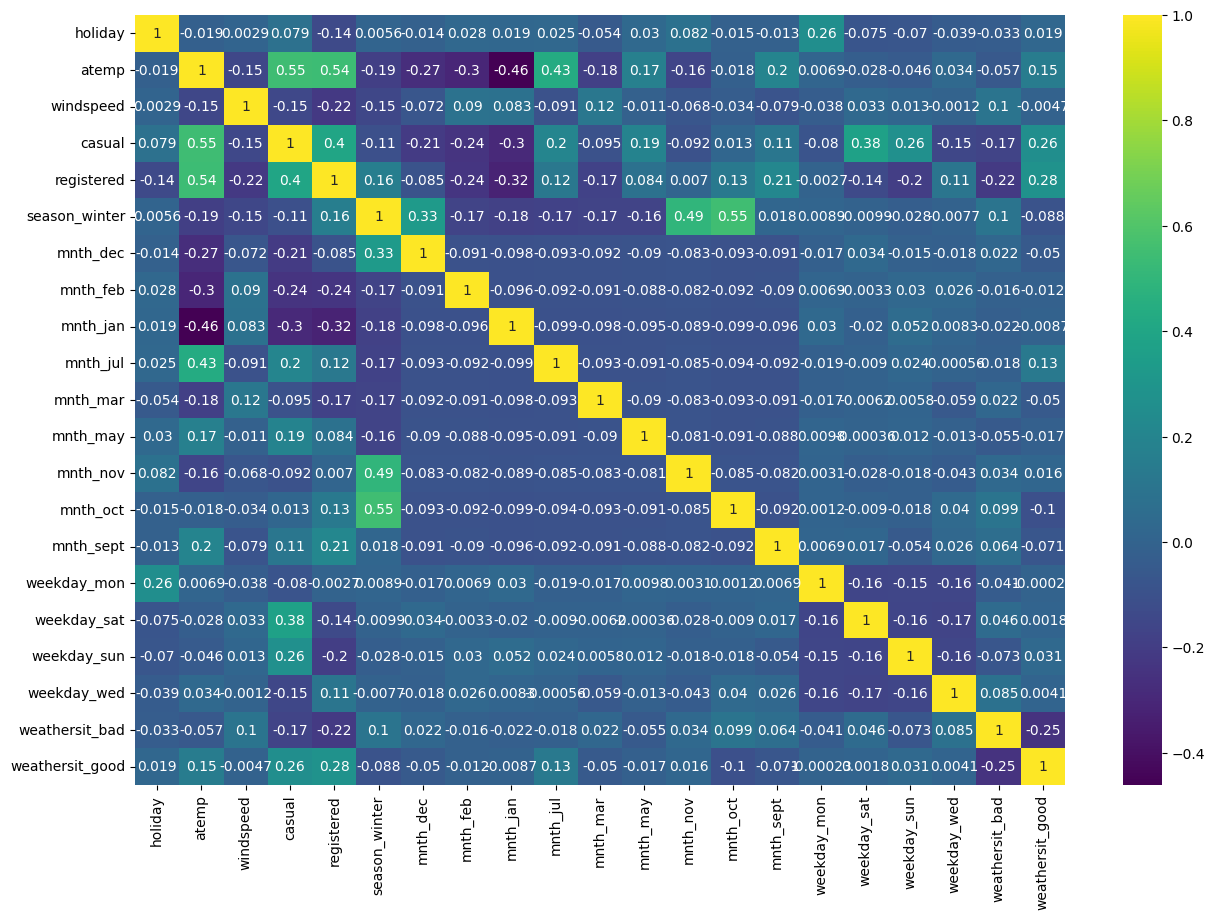

In [40]:
pt.figure(figsize = (15,10))
sns.heatmap(bs_train_X[sel_cols_rfe].corr(), cmap='viridis', annot=True)
pt.show()

In [41]:
# Dropping 'atemp','season_winter', 'casual',
sel_cols_rfe =['holiday', 'windspeed','registered',
       'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_wed',
       'weathersit_bad', 'weathersit_good']

build_model(sel_cols_rfe)
get_vif(sel_cols_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     840.3
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:52:32   Log-Likelihood:                -3705.1
No. Observations:                 511   AIC:                             7448.
Df Residuals:                     492   BIC:                             7529.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             746.3357     75.609     

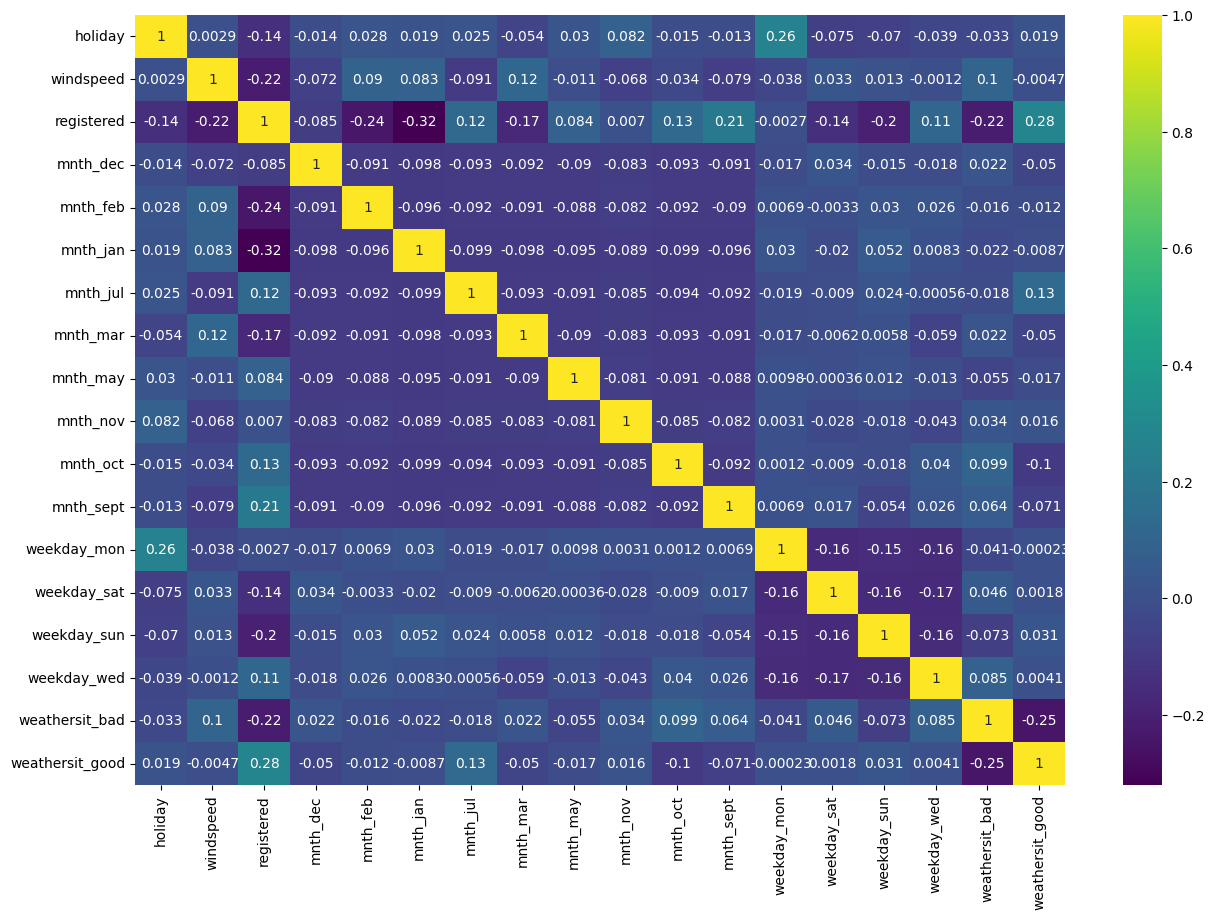

In [42]:
pt.figure(figsize = (15,10))
sns.heatmap(bs_train_X[sel_cols_rfe].corr(), cmap='viridis', annot=True)
pt.show()

Predicting using Tranining Data

In [43]:
linear_reg = linear_reg.fit(bs_train_X[sel_cols_rfe],bs_train_y)

print("Linear Intercepts:",linear_reg.intercept_)
print("Linear coefficient:",linear_reg.coef_)

# y_train_pred = linear_reg.predict(bs_train_X[sel_cols_rfe])

Linear Intercepts: 746.3357079122748
Linear coefficient: [ 785.89748884 -266.69616432 7524.68682941 -632.80011847 -600.96942929
 -620.96194199   44.90976467 -249.42468999  108.50766138 -467.79269558
 -252.49753058 -112.46453349   34.2353169   970.60812139  868.31038947
  -60.34778     -70.01078363  128.67201331]


In [44]:
bs_train_y_pred = linear_reg.predict(bs_train_X[sel_cols_rfe])

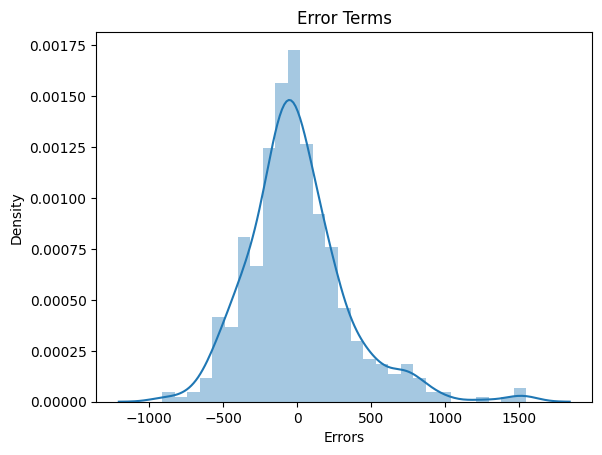

In [45]:
sns.distplot(bs_train_y-bs_train_y_pred)
pt.title('Error Terms')
pt.xlabel('Errors')
pt.show()

In [46]:
#Print R-squared Value
r2_score(bs_train_y,bs_train_y_pred )

0.9684968061157535

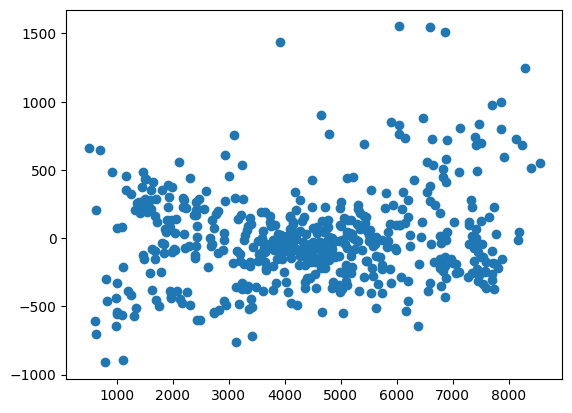

In [47]:
pt.scatter(bs_train_y,bs_train_y-bs_train_y_pred)
pt.show()

In [48]:
bs_test_y_pred = linear_reg.predict(bs_test_X[sel_cols_rfe])

r2_score(bs_test_y,bs_test_y_pred)

0.9580922629176845

Text(0, 0.5, 'y_test_pred')

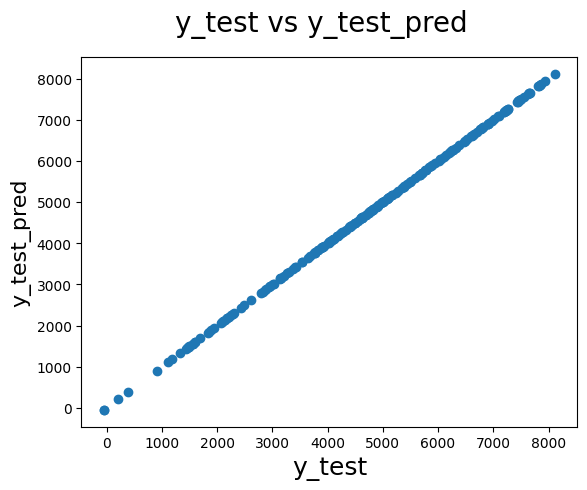

In [49]:
figure = pt.figure()
pt.scatter(bs_test_y_pred, bs_test_y_pred)
figure.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
pt.xlabel('y_test', fontsize = 18)                          # X-label
pt.ylabel('y_test_pred', fontsize = 16)

Text(0, 0.5, 'Counts - Predicted Counts')

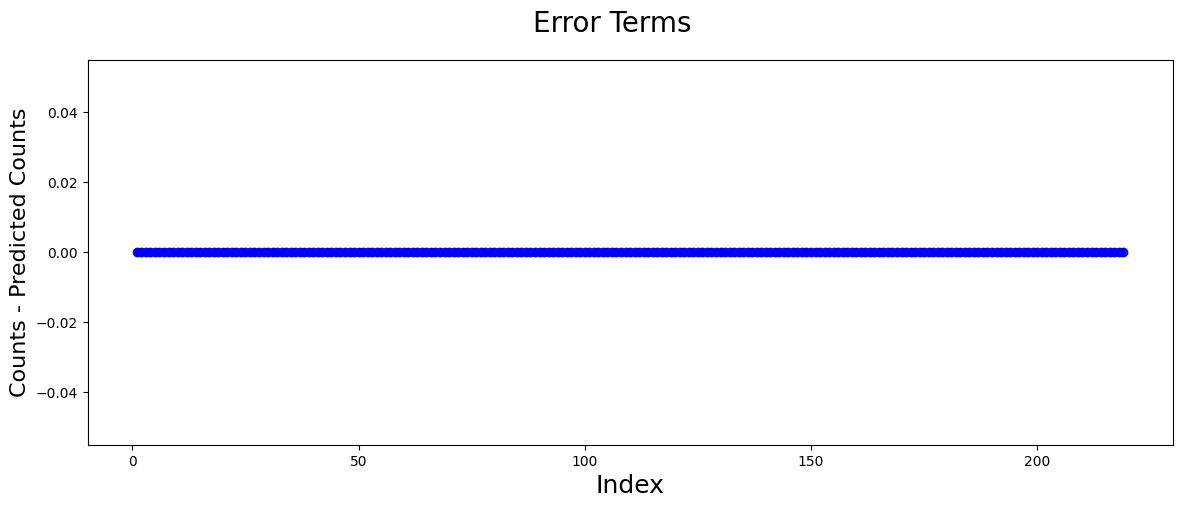

In [50]:
# Error terms

c = [i for i in range(1,220,1)]
fig = pt.figure(figsize=(14,5))
pt.plot(c,bs_test_y_pred-bs_test_y_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
pt.xlabel('Index', fontsize=18)                      # X-label
pt.ylabel('Counts - Predicted Counts', fontsize=16) 